# GRIP : The Sparks  Foundation
## Data Science and Business Analytics  intern
## Author : Vishal Prajapati
## Task : Prediction Using Supervised ML
#### in this task we have to predict the percentage score of student based on the number of hour studied. The task has two variables where the feature is the no. of hours studied and the targate values is the percentage score. This can be solved  using simple linear regression


In [1]:
# Importing required  libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

### Reading data from remote url

In [4]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url) 


### Exploring Data

In [18]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### methemetical summery of data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### shows the summery of data including number numbers  of all values

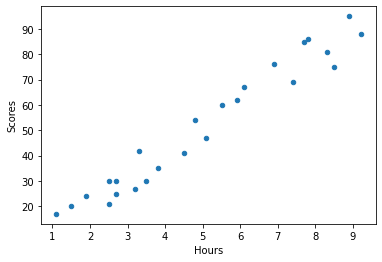

In [8]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [13]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [14]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


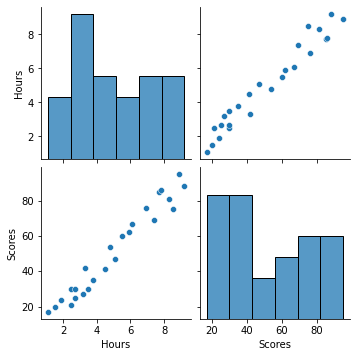

In [25]:
sns.pairplot(data)

#### Form the plot above, we can easily interpret that given data Follows a linear trend
#### Getting the data ready for the regression model
## Linear Regression

In [26]:
x= data.iloc[:,:-1].values
y= data.iloc[:,1].values


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test= train_test_split(x, y,test_size=0.2 , random_state=50)

In [29]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

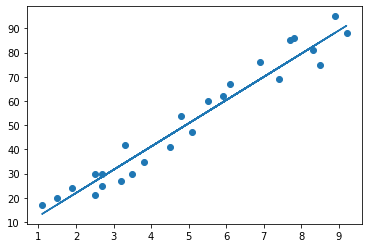

In [30]:
m=reg.coef_
c=reg.intercept_
line=m*x +c
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [31]:
y_pred= reg.predict(x_test)

In [32]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predict':y_pred})
actual_predicted

,Target,Predict
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\visha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

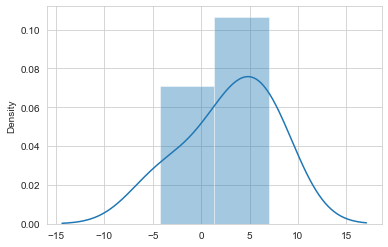

In [35]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show

#### What be the predicted score if a students studies for 9.25 hours/day 

In [49]:
h=9.25
s=reg.predict([[h]])
print("If a student for ",h," hours per day he/she  will score ",s,"% in exam")

If a student for  9.25  hours per day he/she  will score  [91.56986604] % in exam


#### our Linear Regression did a great job!

## Model Evaluation

In [51]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print("Mean absolute eroor :",metrics.mean_absolute_error(y_test, y_pred))
print("R2 score: " , r2_score(y_test,  y_pred))

Mean absolute eroor : 4.5916495300630285
R2 score:  0.971014141329942


# Thank you ☺️